In [2]:
from array import array
import numpy as np
from array import array
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
dirin='/home/rdavis39/CLIM470/CLIM-470-Numerical-Weather-Prediction/'
energy_file ='totalen.dat'

In [4]:
# Variables
ntime = 3    # Number of time steps
nx = 48      # Number of grid points in x-direction
ny = 16      # Number of grid points in y-direction
recl=(nx*ny)*4
total_energy=np.zeros((ntime,nx,ny))

In [5]:
ds_total_energy = open(dirin+energy_file,'rb')
for t in range(ntime):
    tmp = ds_total_energy.read(recl)
    tmp1 = array('f',tmp)
    #tmp2=tmp1[1:-1] #for fortran sequential
    total_energy[t,:,:]=np.reshape(tmp1,(nx,ny))
del tmp,tmp1

In [6]:
# Step 1: Total energy at each time step
total_energy_all = total_energy.sum(axis=(1, 2))  # Sum over spatial dimensions (ny, nx)

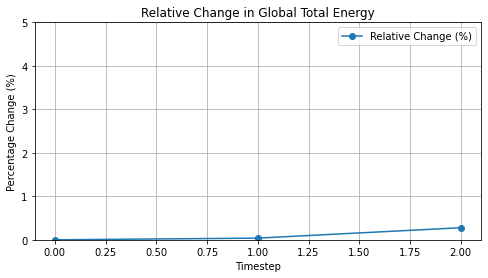

In [14]:
# Step 3: Compute relative change in total energy
energy_relative_change = (total_energy_all - total_energy_all[0]) / total_energy_all[0] * 100

# Step 4: Plot relative change in total energy over time
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_ylim(0, 5)
ax.plot(range(ntime), energy_relative_change, marker='o', label='Relative Change (%)')
ax.set_title('Relative Change in Global Total Energy')
ax.set_xlabel('Timestep')
ax.set_ylabel('Percentage Change (%)')
ax.axhline(0, color='k', linestyle='--', linewidth=1)  # Reference line
ax.legend()
plt.grid()
plt.show()